## Infinite Overlapping Mixture Model with Binary clusters

In [1]:
%load_ext autoreload
%autoreload 2
import utils, iomm

### Synthetic Data

In [2]:
#Generate synthetic data
K=5
N=5
D=8
N_iter=10
alpha_prior = 4
burning_period=3

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [3]:
Z

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [4]:
X

array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.]])

In [5]:
theta

array([[ 0.99005969,  0.19258981,  0.65003844,  0.76994753,  0.01081847,
         0.53827179,  0.9648362 ,  0.12604681],
       [ 0.18112806,  0.47743508,  0.21275185,  0.09564479,  0.50212098,
         0.05083087,  0.43463019,  0.62624382],
       [ 0.60964604,  0.04418717,  0.14244563,  0.39917507,  0.18500992,
         0.004711  ,  0.76037106,  0.2834244 ],
       [ 0.80895784,  0.61194346,  0.07807676,  0.16751872,  0.37097652,
         0.7575252 ,  0.17320994,  0.12225319],
       [ 0.00504706,  0.24419954,  0.91676012,  0.41307391,  0.80166256,
         0.18899734,  0.03223393,  0.39677762]])

#### IOMM algorithm

In [6]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = 4,
                 burning_period=burning_period)

norm_lh[ 0 ] =  463.492270794
norm_lh[ 1 ] =  3.12461418399
norm_lh[ 2 ] =  4.0073923629
norm_lh[ 3 ] =  8.23444675237
norm_lh[ 4 ] =  5.0
norm_lh = 5.0


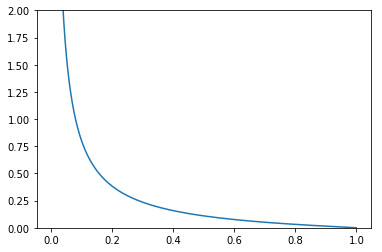

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
plt.plot(np.arange(0,1,0.001),beta.pdf(np.arange(0,1,0.001),2*0.05,0.95*2))
plt.ylim(0,2)
plt.show()

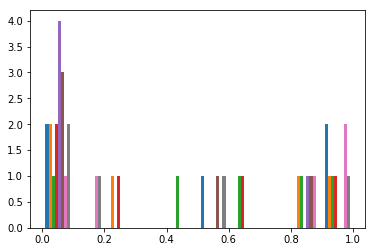

In [8]:
plt.hist(beta.rvs(1*theta,(1-theta)*1))
plt.show()

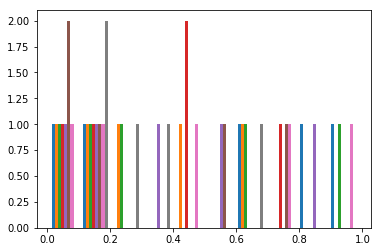

In [9]:
plt.hist(theta)
plt.show()

In [10]:
Z_hat,theta_resampled = IOMM.learning(apply_log=False,random_walk=False)

iteration n° 0
_______3.resample theta|Z,X using MHA_______
redraw theta 0
current theta: [ 0.11767493  0.18112806  0.60964604  0.80895784  0.00504706]
theta_k_d proposal: [  1.21317663e-01   8.50716897e-01   6.59308230e-01   9.99999068e-01
   6.08132387e-04]
joint prior current theta: [ 1.22730695  1.12588191  0.88323127  0.83465079  2.30399904]
joint prior prop theta: [ 1.21984649  0.82629091  0.86950541  0.80000015  3.51795565]
likelihood current theta: [ 0.13336914  0.22119216  1.56177754  4.23444675  1.        ]
likelihood current prop: [  1.38067716e-01   5.69868177e+00   1.93520445e+00   1.07324858e+06
   1.00000000e+00]
ratio likelihood*prior 112524.55794
transition proba current | prop : 0.788003477735
transition proba prop | current : 0.750987116893
acceptance probability = 118070.924244
accept
transition proba current | prop : 0.220074986759
transition proba prop | current : 0.276310382447
acceptance probability = 89623.272131
accept
transition proba current | prop : 0.61461

/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:273: RuntimeWarning: divide by zero encountered in true_divide
  log_theta_ratio = np.log(theta_vect/(1-theta_vect))
/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:277: RuntimeWarning: invalid value encountered in multiply
  temp += self.Z[i,:] * self.X[i,d] * log_theta_ratio


 [  8.00000357e-01   1.38180143e+01   3.06968214e+08   1.46418249e+00
   1.93097718e+00]
likelihood current theta: [  1.29674683e+01   1.00000000e+00   4.73330081e-03   1.00000000e+00
   1.00000000e+00]
likelihood current prop: [  4.47820265e+05   1.00000000e+00   1.20221709e-43   1.00000000e+00
   1.00000000e+00]
ratio likelihood*prior 25814.2476073
transition proba current | prop : 3.11896495739e-05
transition proba prop | current : 12523.5827159
acceptance probability = 6.42896968981e-05
transition proba current | prop : 8.29864880706e-06
transition proba prop | current : 39053.9548269
acceptance probability = 5.48531835152e-06
transition proba current | prop : 2.55193487936e-41
transition proba prop | current : 2.45990458146e+40
acceptance probability = 2.67800138875e-77
transition proba current | prop : 0.212629733808
transition proba prop | current : 2.15539025456
acceptance probability = 2546.58133746
accept
transition proba current | prop : 0.0243536122709
transition proba prop

acceptance probability = 0.00900339828211
transition proba current | prop : 1.71551816663e-24
transition proba prop | current : 5.21639203303e+23
acceptance probability = 8.25259392879e-48
transition proba current | prop : 0.503439983085
transition proba prop | current : 0.626044471042
acceptance probability = 2.01793836557
accept
current theta: [ 0.02625521  0.17871705  0.45984085  0.05453625  0.04456992]
theta_k_d proposal: [  2.46184026e-24   1.94851608e-02   9.97811586e-01   2.82938386e-06
   2.20323590e-04]
joint prior current theta: [ 1.65671148  1.12890343  0.9344767   1.43137334  1.49032719]
joint prior prop theta: [  4.21539245e+04   1.75852760e+00   8.00350607e-01   1.02979698e+01
   4.31000513e+00]
likelihood current theta: [ 1.  1.  1.  1.  1.]
likelihood current prop: [ 1.  1.  1.  1.  1.]
ratio likelihood*prior 6349.35427419
transition proba current | prop : 9.3765774539e-23
transition proba prop | current : 2.55629294018e+21
acceptance probability = 2.32896673141e-40
tra

ratio likelihood*prior 76.9260909427
transition proba current | prop : 1.28261838958
transition proba prop | current : 0.224611138801
acceptance probability = 439.278387566
accept
transition proba current | prop : 0.00171697143685
transition proba prop | current : 417.218027895
acceptance probability = 0.000316572851762
transition proba current | prop : 0.980466730299
transition proba prop | current : 0.291396027433
acceptance probability = 258.834938574
accept
transition proba current | prop : 0.0722503335163
transition proba prop | current : 5.98376478399
acceptance probability = 0.928835929778
accept
transition proba current | prop : 4.56950829666e-12
transition proba prop | current : 72616283630.0
acceptance probability = 4.84071055719e-21
current theta: [ 0.17219189  0.44844627  0.23357441  0.29486527  0.00610956]
theta_k_d proposal: [  1.05096208e-04   9.41923834e-01   8.35823515e-01   9.66238265e-01
   1.03226321e-26]
joint prior current theta: [ 1.1373325   0.93917798  1.070052

/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:150: RuntimeWarning: overflow encountered in double_scalars
  denominator = np.dot(lh_theta_current,prior_theta_current) * trans_theta_prop
/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:273: RuntimeWarning: divide by zero encountered in log
  log_theta_ratio = np.log(theta_vect/(1-theta_vect))


In [11]:
Z_hat

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [12]:
Z

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [13]:
theta_evol=np.zeros([N_iter,K*D])
ind_evol=0
for n in range(N_iter):
    ind_evol=0
    for k in range(K):
        for d in range(D):
            theta_evol[n,ind_evol]=theta_resampled[n][k,d]
            ind_evol=ind_evol+1


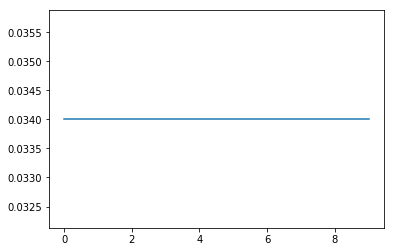

In [14]:
plt.plot(range(N_iter),theta_evol[:,10])
plt.show()

In [15]:
theta_resampled

[array([[  9.25322707e-01,   6.85389551e-06,   9.21726130e-01,
           1.72191889e-01,   4.31484309e-05,   8.28634720e-02,
           1.23675291e-03,   2.15293842e-01],
        [  6.39939502e-02,   1.94851608e-02,   3.40048901e-02,
           9.41923834e-01,   9.01784011e-01,   7.92951294e-01,
           9.99999144e-01,   1.48667596e-02],
        [  3.91357340e-02,   2.63987236e-06,   4.56545341e-01,
           8.35823515e-01,   1.98850565e-02,   4.71100222e-03,
           1.09165886e-04,   4.56387349e-01],
        [  1.81969390e-03,   5.66254954e-04,   3.21048868e-01,
           1.35632997e-01,   1.56052853e-02,   1.79676030e-03,
           3.67044436e-03,   1.59725238e-01],
        [  6.40858451e-01,   5.50790832e-03,   3.74485470e-02,
           6.10955743e-03,   7.05801047e-01,   3.14430347e-01,
           2.71043600e-03,   5.64570757e-01]]),
 array([[  9.25322707e-01,   6.85389551e-06,   9.21726130e-01,
           1.72191889e-01,   4.31484309e-05,   8.28634720e-02,
           1